In [642]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [643]:
#Cargar archivo xlsx 
data = pd.read_csv('Actividad_3.2(PAIS_VENECIA_sin nulos)-paraAct5.csv')


In [644]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 26582 non-null  int64  
 1   Unnamed: 0                   26582 non-null  int64  
 2   id                           26582 non-null  float64
 3   name                         26582 non-null  object 
 4   description                  26582 non-null  object 
 5   neighborhood_overview        26582 non-null  object 
 6   host_id                      26582 non-null  int64  
 7   host_name                    26582 non-null  object 
 8   host_since                   26582 non-null  object 
 9   host_location                26582 non-null  object 
 10  host_about                   26582 non-null  object 
 11  host_response_time           26582 non-null  object 
 12  host_response_rate           26582 non-null  object 
 13  host_acceptance_

In [645]:
#Imprimo los primeros cinco registros del DataFrame
data.head(5)

,Unnamed: 0.1,Unnamed: 0,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_total_listings_count
0,0,0,35797.0,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",153786,Dici,28/06/2010,"Mexico City, Mexico",...,4.58,4.79,4.86,4.87,4.83,4.98,4.48,f,1.74,1
1,1,1,44616.0,Condesa Haus,A new concept of hosting in mexico through a b...,No disponible,196253,Fernando,09/08/2010,"Mexico City, Mexico",...,4.58,4.56,4.70,4.87,4.78,4.98,4.48,f,0.41,13
2,2,2,67703.0,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No disponible,334451,Nicholas,04/01/2011,"Mexico City, Mexico",...,4.90,4.81,4.75,4.94,4.92,4.98,4.91,f,0.31,4
3,3,3,70644.0,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,Trisha,24/08/2010,"Mexico City, Mexico",...,4.91,4.90,4.96,4.96,4.98,4.96,4.92,f,0.83,4
4,4,4,107078.0,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",540705,Andrea,27/04/2011,"Mexico City, Mexico",...,4.91,5.00,5.00,5.00,4.73,4.91,4.82,f,0.11,7


In [646]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(data)

                                                    name  frequency  \
0         Blueground | Roma Sur 1 recamara, AC & rooftop         57   
1                          Blueground | Polanco, parking         49   
2                     Perfecto Loft en gran ubicaciÃƒÂ³n         48   
3      Blueground | Amueblado, Security & Business Ce...         36   
4                               Casa Miravalle | Condesa         21   
...                                                  ...        ...   
25163  Private suite in Condesa Great internet & loca...          1   
25164    Artsy habitaciÃƒÂ³n frente al Parque MÃƒÂ©xico!          1   
25165  LOFT 14 (Parque Delta, Hosp. siglo XXI, Foro Sol)          1   
25166           Apartamento Embajada Las Garzas Cozy&Zen          1   
25167                   Pretty, well centered, amenities          1   

       percentage  cumulative_perc  
0        0.002144         0.002144  
1        0.001843         0.003988  
2        0.001806         0.005793  

In [647]:
# Eliminar % y convertir a número
data["host_response_rate"] = data["host_response_rate"].str.replace('%', '', regex=True).astype(float) / 100  

In [648]:
# Contar solo los valores no nulo
n = data["host_response_rate"].dropna().shape[0]
n

26582

In [649]:
data['host_response_rate'].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [650]:
Min = data["host_response_rate"].min()  
Max = data["host_response_rate"].max()  
Limites = [Min,Max]
Limites

[0.0, 1.0]

In [651]:
R = Max - Min
R

1.0

In [652]:
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [653]:
i = R/ni
i

0.06373636189094067

**Creación de Categorias a partir de clases**

In [654]:
# Ver resultado
intervalos = np.linspace(0.0, 1.1, 12) #Número de clases más uno
intervalos

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

In [655]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [656]:
data["host_response_rate"] = pd.cut(x = data["host_response_rate"], bins = intervalos, labels = categorias)
data["host_response_rate"]

0                NaN
1        Categoría10
2         Categoría8
3        Categoría10
4        Categoría10
            ...     
26577    Categoría10
26578    Categoría10
26579    Categoría10
26580    Categoría10
26581    Categoría10
Name: host_response_rate, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [657]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_response_rate"])
data1

,host_response_rate,frequency,percentage,cumulative_perc
0,Categoría10,23146,0.870740,0.892600
1,Categoría9,1105,0.041569,0.935213
2,Categoría8,459,0.017267,0.952914
3,Categoría7,278,0.010458,0.963634
4,Categoría5,262,0.009856,0.973738
5,Categoría1,181,0.006809,0.980718
6,Categoría4,160,0.006019,0.986888
7,Categoría6,123,0.004627,0.991632
8,Categoría2,115,0.004326,0.996066
9,Categoría3,102,0.003837,1.000000


In [658]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table1 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table1

,host_response_rate,frequency
0,Categoría10,23146
1,Categoría9,1105
2,Categoría8,459
3,Categoría7,278
4,Categoría5,262
5,Categoría1,181
6,Categoría4,160
7,Categoría6,123
8,Categoría2,115
9,Categoría3,102


In [659]:
filtro = table1[table1['frequency'] > 1000]
filtro

,host_response_rate,frequency
0,Categoría10,23146
1,Categoría9,1105


In [660]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro.set_index("host_response_rate")
Filtro_index

,frequency
host_response_rate,
Categoría10,23146
Categoría9,1105


Text(0, 0.5, 'Frecuencia')

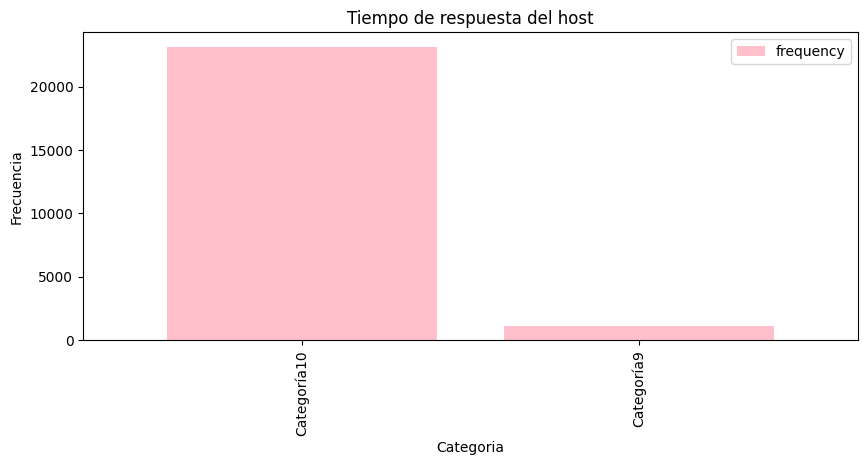

In [661]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "pink")
plt.title('Tiempo de respuesta del host')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')

In [662]:
# Eliminar % y convertir a número
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.replace('%', '', regex=True).astype(float) / 100  

In [663]:
Min = data["host_acceptance_rate"].min()  
Max = data["host_acceptance_rate"].max()  
Limites = [Min,Max]
Limites

[0.0, 1.0]

In [664]:
#Calcula el rango
R = Max - Min
R

1.0

In [665]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [666]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.06373636189094067

In [667]:
# Ver resultado
intervalos = np.linspace(0.0, 1.0, 16) #Número de clases más uno
intervalos

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       1.        ])

In [668]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]


In [669]:
data["host_acceptance_rate"] = pd.cut(x = data["host_acceptance_rate"], bins = intervalos, labels = categorias)
data["host_acceptance_rate"]

0        Categoría14
1        Categoría14
2         Categoría9
3        Categoría15
4        Categoría15
            ...     
26577    Categoría15
26578    Categoría15
26579    Categoría15
26580    Categoría15
26581    Categoría15
Name: host_acceptance_rate, Length: 26582, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [670]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_acceptance_rate"])
data1

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,Categoría15,20199,0.759875,0.790258
1,Categoría14,1619,0.060906,0.853599
2,Categoría13,841,0.031638,0.886502
3,Categoría12,648,0.024377,0.911854
4,Categoría11,558,0.020992,0.933685
5,Categoría8,404,0.015198,0.949491
6,Categoría5,346,0.013016,0.963028
7,Categoría9,216,0.008126,0.971479
8,Categoría10,167,0.006282,0.978013
9,Categoría6,142,0.005342,0.983568


In [671]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table2 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_acceptance_rate,frequency
0,Categoría15,20199
1,Categoría14,1619
2,Categoría13,841
3,Categoría12,648
4,Categoría11,558
5,Categoría8,404
6,Categoría5,346
7,Categoría9,216
8,Categoría10,167
9,Categoría6,142


In [672]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table2 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_acceptance_rate,frequency
0,Categoría15,20199
1,Categoría14,1619
2,Categoría13,841
3,Categoría12,648
4,Categoría11,558
5,Categoría8,404
6,Categoría5,346
7,Categoría9,216
8,Categoría10,167
9,Categoría6,142


In [673]:
filtro2 = table2[table2['frequency'] > 500]
filtro2

,host_acceptance_rate,frequency
0,Categoría15,20199
1,Categoría14,1619
2,Categoría13,841
3,Categoría12,648
4,Categoría11,558


In [674]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro2.set_index("host_acceptance_rate")
Filtro_index

,frequency
host_acceptance_rate,
Categoría15,20199
Categoría14,1619
Categoría13,841
Categoría12,648
Categoría11,558


<Axes: xlabel='host_acceptance_rate'>

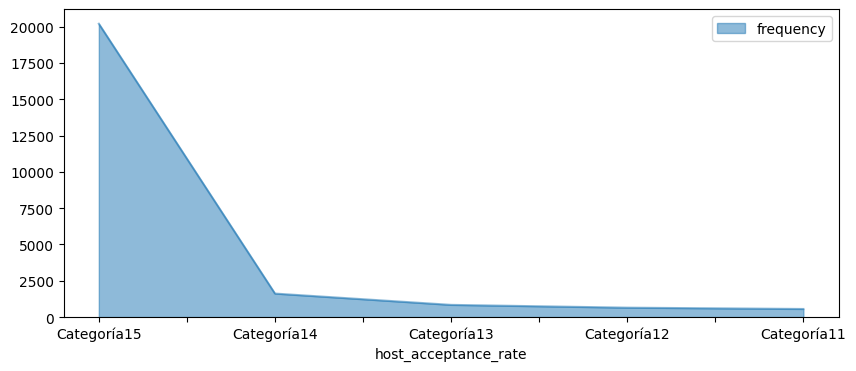

In [675]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [676]:
Min = data["host_total_listings_count"].min()  
Max = data["host_total_listings_count"].max()  
Limites = [Min,Max]
Limites

[1, 7324]

In [677]:
#Calcula el rango
R = Max - Min
R

7323

In [678]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [679]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

466.74137812735853

In [680]:
# Ver resultado
intervalos = np.linspace(1, 7324, 16) #Número de clases más uno
intervalos

array([1.0000e+00, 4.8920e+02, 9.7740e+02, 1.4656e+03, 1.9538e+03,
       2.4420e+03, 2.9302e+03, 3.4184e+03, 3.9066e+03, 4.3948e+03,
       4.8830e+03, 5.3712e+03, 5.8594e+03, 6.3476e+03, 6.8358e+03,
       7.3240e+03])

In [681]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [682]:
data["host_total_listings_count"] = pd.cut(x = data["host_total_listings_count"], bins = intervalos, labels = categorias)
data["host_total_listings_count"]

0               NaN
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
26577    Categoría1
26578    Categoría1
26579    Categoría1
26580    Categoría1
26581    Categoría1
Name: host_total_listings_count, Length: 26582, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [683]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_total_listings_count"])
data1

,host_total_listings_count,frequency,percentage,cumulative_perc
0,Categoría1,21136,0.795125,0.981974
1,Categoría2,374,0.014070,0.999350
2,Categoría15,12,0.000451,0.999907
3,Categoría5,2,0.000075,1.000000
4,Categoría3,0,0.000000,1.000000
5,Categoría4,0,0.000000,1.000000
6,Categoría6,0,0.000000,1.000000
7,Categoría7,0,0.000000,1.000000
8,Categoría8,0,0.000000,1.000000
9,Categoría9,0,0.000000,1.000000


In [684]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table3 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table3

,host_total_listings_count,frequency
0,Categoría1,21136
1,Categoría2,374
2,Categoría15,12
3,Categoría5,2
4,Categoría3,0
5,Categoría4,0
6,Categoría6,0
7,Categoría7,0
8,Categoría8,0
9,Categoría9,0


In [685]:
filtro3 = table3[table3['frequency'] > 10]
filtro3

,host_total_listings_count,frequency
0,Categoría1,21136
1,Categoría2,374
2,Categoría15,12


In [686]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro3.set_index("host_total_listings_count")
Filtro_index

,frequency
host_total_listings_count,
Categoría1,21136
Categoría2,374
Categoría15,12


Text(0, 0.5, 'Frecuencia')

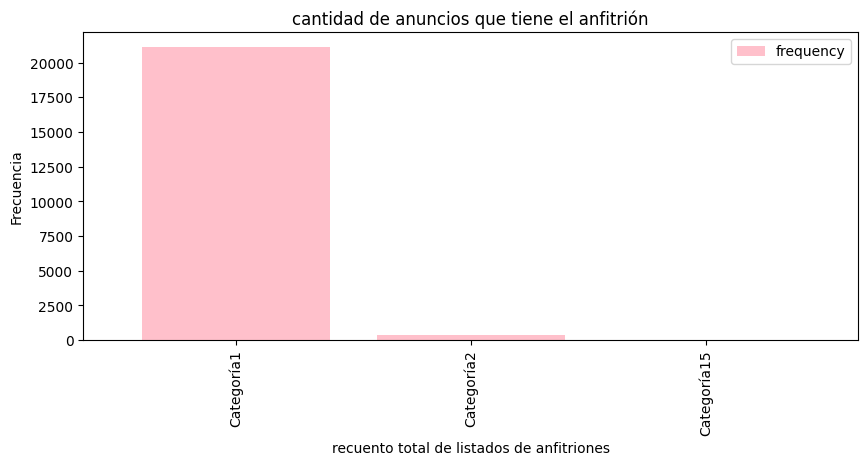

In [687]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "pink")
plt.title('cantidad de anuncios que tiene el anfitrión')
plt.xlabel('recuento total de listados de anfitriones')
plt.ylabel('Frecuencia')

In [688]:
Min = data["accommodates"].min()  
Max = data["accommodates"].max()  
Limites = [Min,Max]
Limites

[1, 16]

In [689]:
#Calcula el rango
R = Max - Min
R

15

In [690]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [691]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.9560454283641101

In [692]:
# Ver resultado
intervalos = np.linspace(1, 16, 12) #Número de clases más uno
intervalos

array([ 1.        ,  2.36363636,  3.72727273,  5.09090909,  6.45454545,
        7.81818182,  9.18181818, 10.54545455, 11.90909091, 13.27272727,
       14.63636364, 16.        ])

In [693]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [694]:
data["accommodates"] = pd.cut(x = data["accommodates"], bins = intervalos, labels = categorias)
data["accommodates"]

0         Categoría1
1        Categoría10
2         Categoría3
3         Categoría1
4         Categoría1
            ...     
26577     Categoría3
26578     Categoría1
26579     Categoría1
26580     Categoría1
26581     Categoría1
Name: accommodates, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [695]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["accommodates"])
data1

,accommodates,frequency,percentage,cumulative_perc
0,Categoría1,10620,0.399518,0.450975
1,Categoría3,7065,0.265781,0.750987
2,Categoría2,2401,0.090324,0.852945
3,Categoría4,1800,0.067715,0.929381
4,Categoría6,610,0.022948,0.955285
5,Categoría5,311,0.011700,0.968491
6,Categoría11,286,0.010759,0.980636
7,Categoría7,216,0.008126,0.989808
8,Categoría9,145,0.005455,0.995966
9,Categoría10,66,0.002483,0.998769


In [696]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table4 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table4

,accommodates,frequency
0,Categoría1,10620
1,Categoría3,7065
2,Categoría2,2401
3,Categoría4,1800
4,Categoría6,610
5,Categoría5,311
6,Categoría11,286
7,Categoría7,216
8,Categoría9,145
9,Categoría10,66


In [697]:
filtro4 = table4[table4['frequency'] > 500]
filtro4

,accommodates,frequency
0,Categoría1,10620
1,Categoría3,7065
2,Categoría2,2401
3,Categoría4,1800
4,Categoría6,610


In [698]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro4.set_index("accommodates")
Filtro_index

,frequency
accommodates,
Categoría1,10620
Categoría3,7065
Categoría2,2401
Categoría4,1800
Categoría6,610


<Axes: ylabel='frequency'>

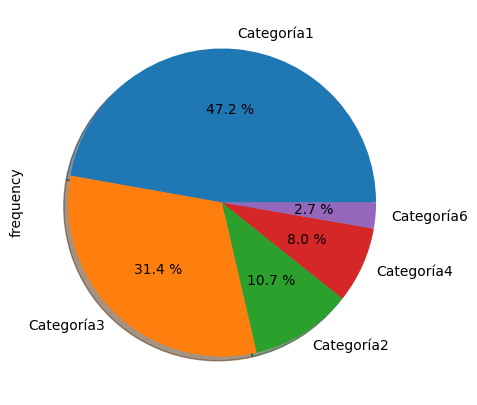

In [699]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

---------------------------------------------------------------------------------------------------------------------------

In [852]:
n = data['bathrooms_text'].dropna().shape[0]
n

0

In [863]:
data['bathrooms_numeric'] = data['bathrooms_text'].astype(str).str.extract(r'(\d+)').astype(float)


In [866]:
# Filtrar valores 0.0
data = data[data['bathrooms_numeric'] != 0.0]

In [867]:
Min = data['bathrooms_text'].min()  
Max = data['bathrooms_text'].max()  
Limites = [Min,Max]
Limites

[nan, nan]

In [703]:
#Calcula el rango
R = Max - Min
R

nan

-----------------------------------------

In [704]:
data['beds'].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: beds
Non-Null Count  Dtype
--------------  -----
26582 non-null  int64
dtypes: int64(1)
memory usage: 207.8 KB


In [705]:
Min = data["beds"].min()  
Max = data["beds"].max()  
Limites = [Min,Max]
Limites

[0, 50]

In [706]:
#Calcula el rango
R = Max - Min
R

50

In [707]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [708]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

3.1868180945470335

In [709]:
# Ver resultado
intervalos = np.linspace(0, 50, 16) #Número de clases más uno
intervalos

array([ 0.        ,  3.33333333,  6.66666667, 10.        , 13.33333333,
       16.66666667, 20.        , 23.33333333, 26.66666667, 30.        ,
       33.33333333, 36.66666667, 40.        , 43.33333333, 46.66666667,
       50.        ])

In [710]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [711]:
data["beds"] = pd.cut(x = data["beds"], bins = intervalos, labels = categorias)
data["beds"]


0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
26577    Categoría1
26578    Categoría1
26579    Categoría1
26580    Categoría1
26581    Categoría1
Name: beds, Length: 26582, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [712]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["beds"])
data1

,beds,frequency,percentage,cumulative_perc
0,Categoría1,23663,0.890189,0.906281
1,Categoría2,1981,0.074524,0.982152
2,Categoría3,336,0.012640,0.995021
3,Categoría4,61,0.002295,0.997357
4,Categoría5,35,0.001317,0.998698
5,Categoría6,16,0.000602,0.999311
6,Categoría7,8,0.000301,0.999617
7,Categoría8,3,0.000113,0.999732
8,Categoría15,3,0.000113,0.999847
9,Categoría12,2,0.000075,0.999923


In [713]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table5 = data1.drop(['percentage'], axis=1)
table5

,beds,frequency,cumulative_perc
0,Categoría1,23663,0.906281
1,Categoría2,1981,0.982152
2,Categoría3,336,0.995021
3,Categoría4,61,0.997357
4,Categoría5,35,0.998698
5,Categoría6,16,0.999311
6,Categoría7,8,0.999617
7,Categoría8,3,0.999732
8,Categoría15,3,0.999847
9,Categoría12,2,0.999923


In [714]:
filtro5 = table5[table5['frequency'] > 300]
filtro5

,beds,frequency,cumulative_perc
0,Categoría1,23663,0.906281
1,Categoría2,1981,0.982152
2,Categoría3,336,0.995021


In [715]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro5.set_index("beds")
Filtro_index

,frequency,cumulative_perc
beds,,
Categoría1,23663,0.906281
Categoría2,1981,0.982152
Categoría3,336,0.995021


<Axes: ylabel='frequency'>

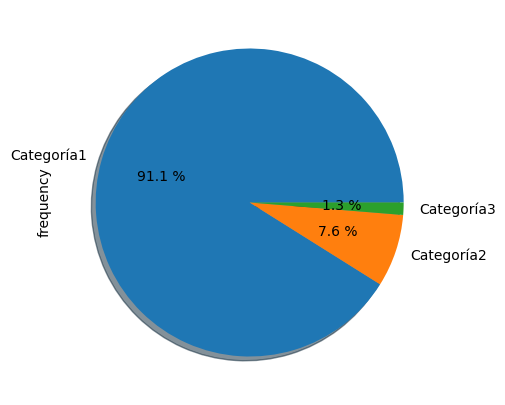

In [716]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [717]:
data['price'].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
26582 non-null  object
dtypes: object(1)
memory usage: 207.8+ KB


In [718]:
# Eliminar caracteres no numéricos ($, ,)
data["price"] = data["price"].str.replace("[$,]", "", regex=True)

# Convertir a número
data["price"] = pd.to_numeric(data["price"], errors="coerce")

In [719]:
Min = data["price"].min()  
Max = data["price"].max()  
Limites = [Min,Max]
Limites

[0.0, 435481.0]

In [720]:
#Calcula el rango
R = Max - Min
R

435481.0

In [721]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [722]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

27755.974612628735

In [723]:
# Ver resultado
intervalos = np.linspace(0.0,435481.0, 16) #Número de clases más uno
intervalos

array([     0.        ,  29032.06666667,  58064.13333333,  87096.2       ,
       116128.26666667, 145160.33333333, 174192.4       , 203224.46666667,
       232256.53333333, 261288.6       , 290320.66666667, 319352.73333333,
       348384.8       , 377416.86666667, 406448.93333333, 435481.        ])

In [724]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [725]:
data["price"] = pd.cut(x = data["price"], bins = intervalos, labels = categorias)
data["price"]

0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
26577    Categoría1
26578    Categoría1
26579    Categoría1
26580    Categoría1
26581    Categoría1
Name: price, Length: 26582, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [726]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["price"])
data1

,price,frequency,percentage,cumulative_perc
0,Categoría1,26546,0.998646,0.998683
1,Categoría2,26,0.000978,0.999661
2,Categoría15,3,0.000113,0.999774
3,Categoría3,2,0.000075,0.999850
4,Categoría4,2,0.000075,0.999925
5,Categoría6,1,0.000038,0.999962
6,Categoría10,1,0.000038,1.000000
7,Categoría5,0,0.000000,1.000000
8,Categoría7,0,0.000000,1.000000
9,Categoría8,0,0.000000,1.000000


In [727]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table6 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table6

,price,frequency
0,Categoría1,26546
1,Categoría2,26
2,Categoría15,3
3,Categoría3,2
4,Categoría4,2
5,Categoría6,1
6,Categoría10,1
7,Categoría5,0
8,Categoría7,0
9,Categoría8,0


In [728]:
filtro6 = table6[table6['frequency'] > 2]
filtro6

,price,frequency
0,Categoría1,26546
1,Categoría2,26
2,Categoría15,3


In [729]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro6.set_index("price")
Filtro_index

,frequency
price,
Categoría1,26546
Categoría2,26
Categoría15,3


Text(0, 0.5, 'Frecuencia')

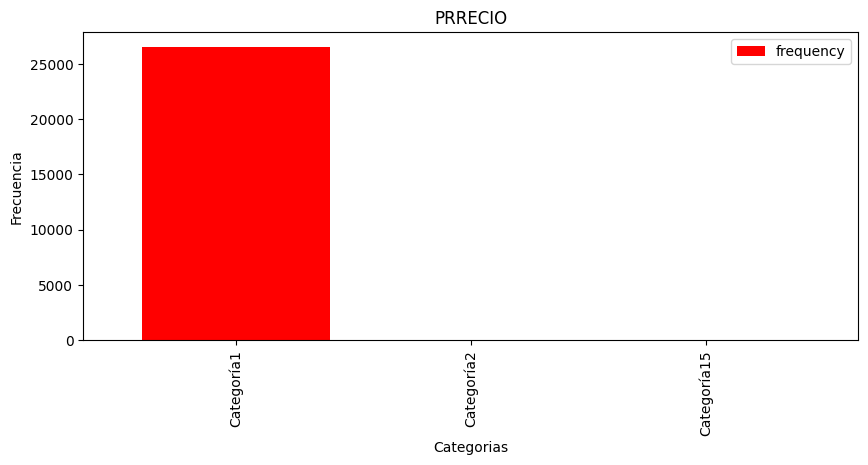

In [730]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('PRRECIO')
plt.xlabel('Categorias')
plt.ylabel('Frecuencia')

In [731]:
Min = data["maximum_nights_avg_ntm"].min()  
Max = data["maximum_nights_avg_ntm"].max()  
Limites = [Min,Max]
Limites

[1.0, 9101.4]

In [732]:
#Calcula el rango
R = Max - Min
R

9100.4

In [733]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [734]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

580.0263877523165

In [735]:
# Ver resultado
intervalos = np.linspace(0.0, 1.0, 12) #Número de clases más uno
intervalos

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

In [736]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [737]:
data["maximum_nights_avg_ntm"] = pd.cut(x = data["maximum_nights_avg_ntm"], bins = intervalos, labels = categorias)
data["maximum_nights_avg_ntm"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
26577    NaN
26578    NaN
26579    NaN
26580    NaN
26581    NaN
Name: maximum_nights_avg_ntm, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [738]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["maximum_nights_avg_ntm"])
data1

,maximum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Categoría11,13,0.000489,1.0
1,Categoría1,0,0.000000,1.0
2,Categoría2,0,0.000000,1.0
3,Categoría3,0,0.000000,1.0
4,Categoría4,0,0.000000,1.0
5,Categoría5,0,0.000000,1.0
6,Categoría6,0,0.000000,1.0
7,Categoría7,0,0.000000,1.0
8,Categoría8,0,0.000000,1.0
9,Categoría9,0,0.000000,1.0


In [739]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table7 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table7

,maximum_nights_avg_ntm,frequency
0,Categoría11,13
1,Categoría1,0
2,Categoría2,0
3,Categoría3,0
4,Categoría4,0
5,Categoría5,0
6,Categoría6,0
7,Categoría7,0
8,Categoría8,0
9,Categoría9,0


In [740]:
filtro7 = table7[table7['frequency'] > 1]
filtro7

,maximum_nights_avg_ntm,frequency
0,Categoría11,13


In [741]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro7.set_index("maximum_nights_avg_ntm")
Filtro_index

,frequency
maximum_nights_avg_ntm,
Categoría11,13


<Axes: xlabel='maximum_nights_avg_ntm'>

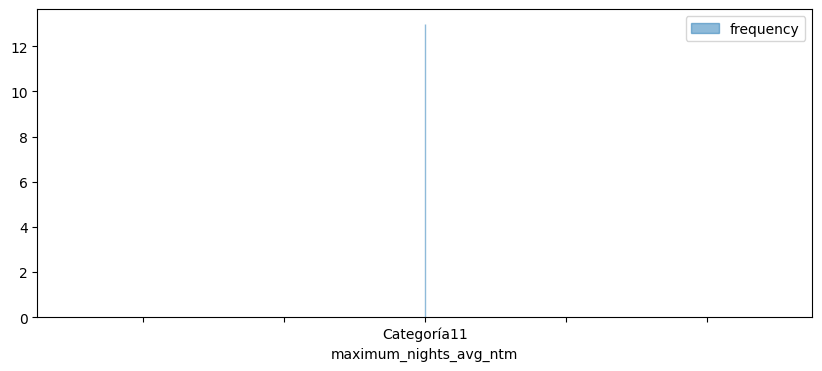

In [742]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [743]:
Min = data["availability_365"].min()  
Max = data["availability_365"].max()  
Limites = [Min,Max]
Limites

[0, 365]

In [744]:
#Calcula el rango
R = Max - Min
R

365

In [745]:
n=26582

In [746]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [747]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

23.263772090193346

In [748]:
# Ver resultado
intervalos = np.linspace(0, 365, 12) #Número de clases más uno
intervalos

array([  0.        ,  33.18181818,  66.36363636,  99.54545455,
       132.72727273, 165.90909091, 199.09090909, 232.27272727,
       265.45454545, 298.63636364, 331.81818182, 365.        ])

In [749]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [750]:
data["availability_365"] = pd.cut(x = data["availability_365"], bins = intervalos, labels = categorias)
data["availability_365"]

0        Categoría11
1        Categoría10
2        Categoría10
3         Categoría8
4         Categoría9
            ...     
26577    Categoría11
26578     Categoría6
26579     Categoría6
26580     Categoría6
26581     Categoría5
Name: availability_365, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [751]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["availability_365"])
data1

,availability_365,frequency,percentage,cumulative_perc
0,Categoría11,7774,0.292454,0.320948
1,Categoría10,2757,0.103717,0.434770
2,Categoría9,2400,0.090287,0.533854
3,Categoría8,2114,0.079527,0.621130
4,Categoría3,2104,0.079151,0.707993
5,Categoría5,1436,0.054022,0.767278
6,Categoría6,1423,0.053532,0.826026
7,Categoría2,1346,0.050636,0.881595
8,Categoría1,1000,0.037619,0.922880
9,Categoría7,960,0.036115,0.962513


In [752]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table8 = data1.drop(['percentage'], axis=1)
table8

,availability_365,frequency,cumulative_perc
0,Categoría11,7774,0.320948
1,Categoría10,2757,0.434770
2,Categoría9,2400,0.533854
3,Categoría8,2114,0.621130
4,Categoría3,2104,0.707993
5,Categoría5,1436,0.767278
6,Categoría6,1423,0.826026
7,Categoría2,1346,0.881595
8,Categoría1,1000,0.922880
9,Categoría7,960,0.962513


In [753]:
filtro8 = table8[table8['frequency'] > 1000]
filtro8

,availability_365,frequency,cumulative_perc
0,Categoría11,7774,0.320948
1,Categoría10,2757,0.434770
2,Categoría9,2400,0.533854
3,Categoría8,2114,0.621130
4,Categoría3,2104,0.707993
5,Categoría5,1436,0.767278
6,Categoría6,1423,0.826026
7,Categoría2,1346,0.881595


In [754]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro8.set_index("availability_365")
Filtro_index

,frequency,cumulative_perc
availability_365,,
Categoría11,7774,0.320948
Categoría10,2757,0.434770
Categoría9,2400,0.533854
Categoría8,2114,0.621130
Categoría3,2104,0.707993
Categoría5,1436,0.767278
Categoría6,1423,0.826026
Categoría2,1346,0.881595


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

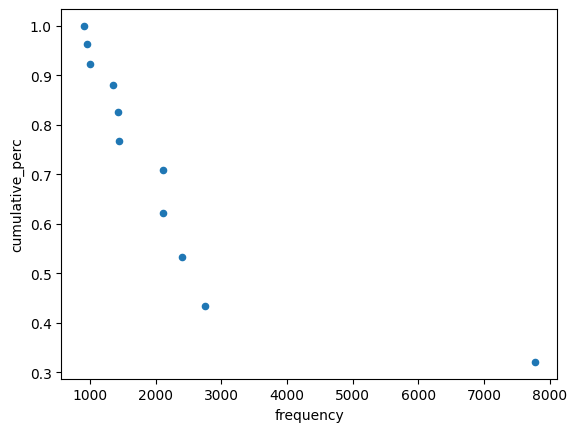

In [755]:
#Realizamos grafico de dispersión del dataframe filtrado
table8.plot("frequency", "cumulative_perc", kind="scatter")

In [756]:
Min = data["number_of_reviews"].min()  
Max = data["number_of_reviews"].max()  
Limites = [Min,Max]
Limites

[0, 1282]

In [757]:
#Calcula el rango
R = Max - Min
R

1282

In [758]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [759]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

81.71001594418594

In [760]:
# Ver resultado
intervalos = np.linspace(0, 1282, 12) #Número de clases más uno
intervalos

array([   0.        ,  116.54545455,  233.09090909,  349.63636364,
        466.18181818,  582.72727273,  699.27272727,  815.81818182,
        932.36363636, 1048.90909091, 1165.45454545, 1282.        ])

In [761]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [762]:
data["number_of_reviews"] = pd.cut(x = data["number_of_reviews"], bins = intervalos, labels = categorias)
data["number_of_reviews"]


0               NaN
1        Categoría1
2        Categoría1
3        Categoría2
4        Categoría1
            ...    
26577           NaN
26578           NaN
26579           NaN
26580           NaN
26581           NaN
Name: number_of_reviews, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [763]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["number_of_reviews"])
data1

,number_of_reviews,frequency,percentage,cumulative_perc
0,Categoría1,19966,0.751110,0.870889
1,Categoría2,2099,0.078963,0.962444
2,Categoría3,554,0.020841,0.986609
3,Categoría4,204,0.007674,0.995507
4,Categoría5,59,0.002220,0.998081
5,Categoría6,23,0.000865,0.999084
6,Categoría7,11,0.000414,0.999564
7,Categoría8,6,0.000226,0.999826
8,Categoría9,2,0.000075,0.999913
9,Categoría10,1,0.000038,0.999956


In [764]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table9 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table9

,number_of_reviews,frequency
0,Categoría1,19966
1,Categoría2,2099
2,Categoría3,554
3,Categoría4,204
4,Categoría5,59
5,Categoría6,23
6,Categoría7,11
7,Categoría8,6
8,Categoría9,2
9,Categoría10,1


In [765]:
filtro9 = table9[table9['frequency'] > 10]
filtro9

,number_of_reviews,frequency
0,Categoría1,19966
1,Categoría2,2099
2,Categoría3,554
3,Categoría4,204
4,Categoría5,59
5,Categoría6,23
6,Categoría7,11


In [766]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro9.set_index("number_of_reviews")
Filtro_index


,frequency
number_of_reviews,
Categoría1,19966
Categoría2,2099
Categoría3,554
Categoría4,204
Categoría5,59
Categoría6,23
Categoría7,11


<Axes: xlabel='number_of_reviews'>

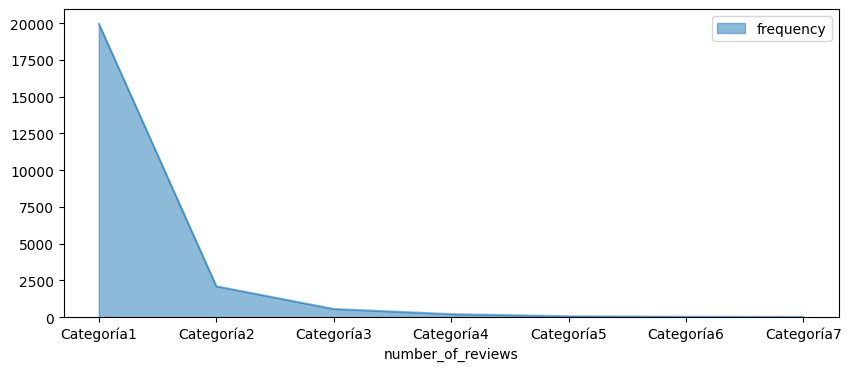

In [767]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [768]:
Min = data["review_scores_location"].min()  
Max = data["review_scores_location"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [769]:
#Calcula el rango
R = Max - Min
R

4.0

In [770]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni


15.689631010177528

In [771]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [772]:
# Ver resultado
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [773]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [774]:
data["review_scores_location"] = pd.cut(x = data["review_scores_location"], bins = intervalos, labels = categorias)
data["review_scores_location"]


0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_location, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [775]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_location"])
data1

,review_scores_location,frequency,percentage,cumulative_perc
0,Categoría11,23805,0.895531,0.897117
1,Categoría10,1914,0.072004,0.969248
2,Categoría9,573,0.021556,0.990842
3,Categoría6,89,0.003348,0.994196
4,Categoría8,77,0.002897,0.997098
5,Categoría7,48,0.001806,0.998907
6,Categoría3,21,0.000790,0.999699
7,Categoría5,5,0.000188,0.999887
8,Categoría2,2,0.000075,0.999962
9,Categoría4,1,0.000038,1.000000


In [776]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table10 = data1.drop(['percentage'], axis=1)
table10

,review_scores_location,frequency,cumulative_perc
0,Categoría11,23805,0.897117
1,Categoría10,1914,0.969248
2,Categoría9,573,0.990842
3,Categoría6,89,0.994196
4,Categoría8,77,0.997098
5,Categoría7,48,0.998907
6,Categoría3,21,0.999699
7,Categoría5,5,0.999887
8,Categoría2,2,0.999962
9,Categoría4,1,1.000000


In [777]:
filtro10 = table10[table10['frequency'] > 20]
filtro10

,review_scores_location,frequency,cumulative_perc
0,Categoría11,23805,0.897117
1,Categoría10,1914,0.969248
2,Categoría9,573,0.990842
3,Categoría6,89,0.994196
4,Categoría8,77,0.997098
5,Categoría7,48,0.998907
6,Categoría3,21,0.999699


In [778]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro10.set_index("review_scores_location")
Filtro_index

,frequency,cumulative_perc
review_scores_location,,
Categoría11,23805,0.897117
Categoría10,1914,0.969248
Categoría9,573,0.990842
Categoría6,89,0.994196
Categoría8,77,0.997098
Categoría7,48,0.998907
Categoría3,21,0.999699


Text(0, 0.5, 'Frecuencia')

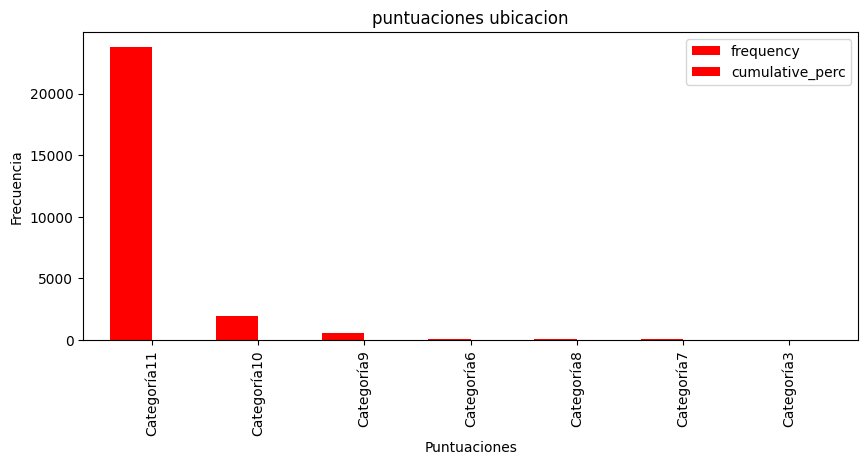

In [779]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('puntuaciones ubicacion')
plt.xlabel('Puntuaciones')
plt.ylabel('Frecuencia')

In [780]:
Min = data["review_scores_value"].min()  
Max = data["review_scores_value"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [781]:
#Calcula el rango
R = Max - Min
R

4.0

In [782]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [783]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [784]:
# Ver resultado
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [785]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [786]:
data["review_scores_value"] = pd.cut(x = data["review_scores_value"], bins = intervalos, labels = categorias)
data["review_scores_value"]

0        Categoría10
1        Categoría10
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_value, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [787]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_value"])
data1

,review_scores_value,frequency,percentage,cumulative_perc
0,Categoría11,20764,0.781130,0.783488
1,Categoría10,3984,0.149876,0.933816
2,Categoría9,1147,0.043149,0.977096
3,Categoría8,210,0.007900,0.985020
4,Categoría6,184,0.006922,0.991963
5,Categoría7,137,0.005154,0.997132
6,Categoría3,39,0.001467,0.998604
7,Categoría5,30,0.001129,0.999736
8,Categoría4,4,0.000150,0.999887
9,Categoría2,3,0.000113,1.000000


In [788]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table11 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table11

,review_scores_value,frequency
0,Categoría11,20764
1,Categoría10,3984
2,Categoría9,1147
3,Categoría8,210
4,Categoría6,184
5,Categoría7,137
6,Categoría3,39
7,Categoría5,30
8,Categoría4,4
9,Categoría2,3


In [789]:

filtro11 = table11[table11['frequency'] > 30]
filtro11

,review_scores_value,frequency
0,Categoría11,20764
1,Categoría10,3984
2,Categoría9,1147
3,Categoría8,210
4,Categoría6,184
5,Categoría7,137
6,Categoría3,39


In [790]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro11.set_index("review_scores_value")
Filtro_index

,frequency
review_scores_value,
Categoría11,20764
Categoría10,3984
Categoría9,1147
Categoría8,210
Categoría6,184
Categoría7,137
Categoría3,39


<Axes: xlabel='review_scores_value'>

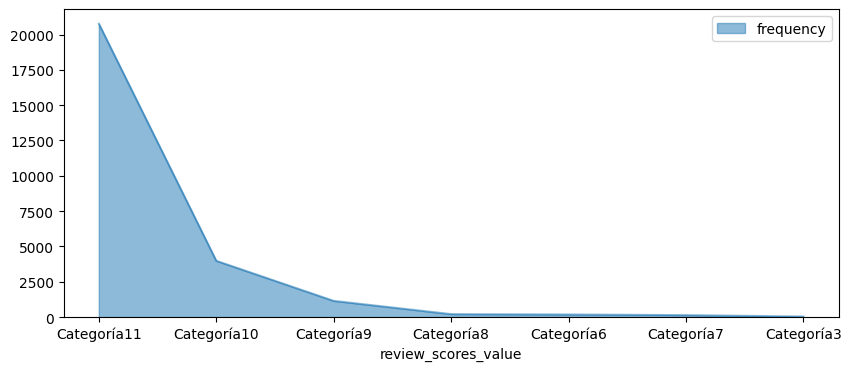

In [791]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [792]:
Min = data["reviews_per_month"].min()  
Max = data["reviews_per_month"].max()  
Limites = [Min,Max]
Limites

[0.01, 38.67]

In [793]:
#Calcula el rango
R = Max - Min
R

38.660000000000004

In [794]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [795]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

2.4640477507037666

In [796]:
intervalos = np.linspace(0.01, 38.67, 12) #Número de clases más uno
intervalos

array([1.00000000e-02, 3.52454545e+00, 7.03909091e+00, 1.05536364e+01,
       1.40681818e+01, 1.75827273e+01, 2.10972727e+01, 2.46118182e+01,
       2.81263636e+01, 3.16409091e+01, 3.51554545e+01, 3.86700000e+01])

In [797]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [798]:
data["reviews_per_month"] = pd.cut(x = data["reviews_per_month"], bins = intervalos, labels = categorias)
data["reviews_per_month"]

0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
26577    Categoría1
26578    Categoría1
26579    Categoría1
26580    Categoría1
26581    Categoría1
Name: reviews_per_month, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [799]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["reviews_per_month"])
data1

,reviews_per_month,frequency,percentage,cumulative_perc
0,Categoría1,23503,0.884170,0.886370
1,Categoría2,2585,0.097246,0.983859
2,Categoría3,317,0.011925,0.995814
3,Categoría4,65,0.002445,0.998265
4,Categoría5,18,0.000677,0.998944
5,Categoría6,13,0.000489,0.999434
6,Categoría7,6,0.000226,0.999661
7,Categoría10,3,0.000113,0.999774
8,Categoría11,3,0.000113,0.999887
9,Categoría9,2,0.000075,0.999962


In [800]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table12 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table12

,reviews_per_month,frequency
0,Categoría1,23503
1,Categoría2,2585
2,Categoría3,317
3,Categoría4,65
4,Categoría5,18
5,Categoría6,13
6,Categoría7,6
7,Categoría10,3
8,Categoría11,3
9,Categoría9,2


In [801]:
filtro12 = table12[table12['frequency'] > 2]
filtro12

,reviews_per_month,frequency
0,Categoría1,23503
1,Categoría2,2585
2,Categoría3,317
3,Categoría4,65
4,Categoría5,18
5,Categoría6,13
6,Categoría7,6
7,Categoría10,3
8,Categoría11,3


In [802]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro12.set_index("reviews_per_month")
Filtro_index


,frequency
reviews_per_month,
Categoría1,23503
Categoría2,2585
Categoría3,317
Categoría4,65
Categoría5,18
Categoría6,13
Categoría7,6
Categoría10,3
Categoría11,3


Text(0, 0.5, 'Frecuencia')

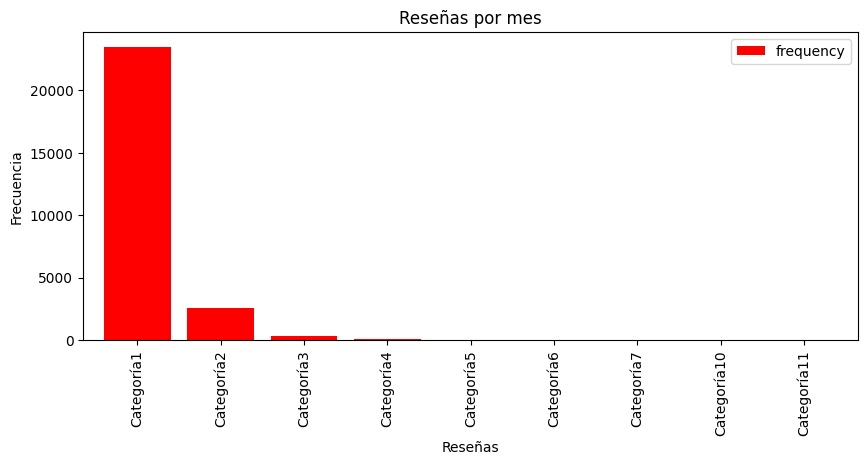

In [803]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('Reseñas por mes')
plt.xlabel('Reseñas')
plt.ylabel('Frecuencia')

In [804]:
Min = data["review_scores_communication"].min()  
Max = data["review_scores_communication"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [805]:
#Calcula el rango
R = Max - Min
R

4.0

In [806]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [807]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [808]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [809]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [810]:
data["review_scores_communication"] = pd.cut(x = data["review_scores_communication"], bins = intervalos, labels = categorias)
data["review_scores_communication"]

0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_communication, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [811]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_communication"])
data1

,review_scores_communication,frequency,percentage,cumulative_perc
0,Categoría11,24085,0.906064,0.908354
1,Categoría10,1558,0.058611,0.967113
2,Categoría9,491,0.018471,0.985631
3,Categoría8,137,0.005154,0.990798
4,Categoría6,102,0.003837,0.994645
5,Categoría7,86,0.003235,0.997888
6,Categoría5,26,0.000978,0.998869
7,Categoría3,16,0.000602,0.999472
8,Categoría4,6,0.000226,0.999698
9,Categoría2,5,0.000188,0.999887


In [812]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table13 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table13

,review_scores_communication,frequency
0,Categoría11,24085
1,Categoría10,1558
2,Categoría9,491
3,Categoría8,137
4,Categoría6,102
5,Categoría7,86
6,Categoría5,26
7,Categoría3,16
8,Categoría4,6
9,Categoría2,5


In [813]:
filtro13 = table13[table13['frequency'] > 400]
filtro13

,review_scores_communication,frequency
0,Categoría11,24085
1,Categoría10,1558
2,Categoría9,491


In [814]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro13.set_index("review_scores_communication")
Filtro_index

,frequency
review_scores_communication,
Categoría11,24085
Categoría10,1558
Categoría9,491


<Axes: ylabel='frequency'>

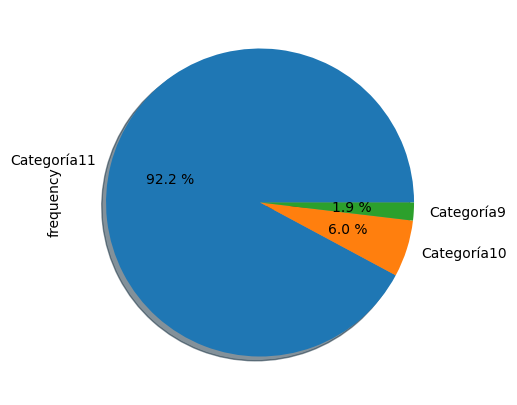

In [815]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [816]:
Min = data["review_scores_checkin"].min()  
Max = data["review_scores_checkin"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [817]:
#Calcula el rango
R = Max - Min
R

4.0

In [818]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [819]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [820]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [821]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [822]:
data["review_scores_checkin"] = pd.cut(x = data["review_scores_checkin"], bins = intervalos, labels = categorias)
data["review_scores_checkin"]


0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_checkin, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [823]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_checkin"])
data1

,review_scores_checkin,frequency,percentage,cumulative_perc
0,Categoría11,24047,0.904635,0.906784
1,Categoría10,1576,0.059288,0.966213
2,Categoría9,604,0.022722,0.988989
3,Categoría8,100,0.003762,0.992760
4,Categoría6,97,0.003649,0.996418
5,Categoría7,67,0.002521,0.998944
6,Categoría3,13,0.000489,0.999434
7,Categoría5,9,0.000339,0.999774
8,Categoría4,5,0.000188,0.999962
9,Categoría2,1,0.000038,1.000000


In [824]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table14 = data1.drop(['percentage'], axis=1)
table14

,review_scores_checkin,frequency,cumulative_perc
0,Categoría11,24047,0.906784
1,Categoría10,1576,0.966213
2,Categoría9,604,0.988989
3,Categoría8,100,0.992760
4,Categoría6,97,0.996418
5,Categoría7,67,0.998944
6,Categoría3,13,0.999434
7,Categoría5,9,0.999774
8,Categoría4,5,0.999962
9,Categoría2,1,1.000000


In [825]:
filtro14 = table14[table14['frequency'] > 50]
filtro14

,review_scores_checkin,frequency,cumulative_perc
0,Categoría11,24047,0.906784
1,Categoría10,1576,0.966213
2,Categoría9,604,0.988989
3,Categoría8,100,0.992760
4,Categoría6,97,0.996418
5,Categoría7,67,0.998944


In [826]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro14.set_index("review_scores_checkin")
Filtro_index

,frequency,cumulative_perc
review_scores_checkin,,
Categoría11,24047,0.906784
Categoría10,1576,0.966213
Categoría9,604,0.988989
Categoría8,100,0.992760
Categoría6,97,0.996418
Categoría7,67,0.998944


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

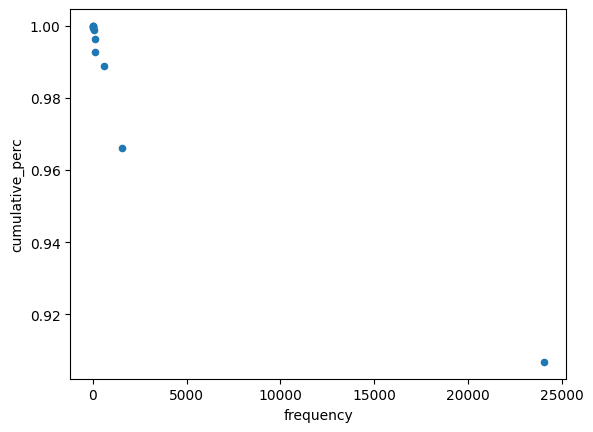

In [827]:
#Realizamos grafico de dispersión del dataframe filtrado
table14.plot("frequency", "cumulative_perc", kind="scatter")

In [828]:
Min = data["review_scores_cleanliness"].min()  
Max = data["review_scores_cleanliness"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [829]:
#Calcula el rango
R = Max - Min
R


4.0

In [830]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [831]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i


0.2549454475637627

In [832]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [833]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [834]:
data["review_scores_cleanliness"] = pd.cut(x = data["review_scores_cleanliness"], bins = intervalos, labels = categorias)
data["review_scores_cleanliness"]


0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_cleanliness, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [835]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_cleanliness"])
data1

,review_scores_cleanliness,frequency,percentage,cumulative_perc
0,Categoría11,22277,0.838048,0.839849
1,Categoría10,2976,0.111955,0.952045
2,Categoría9,828,0.031149,0.983261
3,Categoría8,165,0.006207,0.989482
4,Categoría6,129,0.004853,0.994345
5,Categoría7,97,0.003649,0.998002
6,Categoría3,35,0.001317,0.999321
7,Categoría5,16,0.000602,0.999925
8,Categoría4,2,0.000075,1.000000
9,Categoría1,0,0.000000,1.000000


In [836]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table15 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table15

,review_scores_cleanliness,frequency
0,Categoría11,22277
1,Categoría10,2976
2,Categoría9,828
3,Categoría8,165
4,Categoría6,129
5,Categoría7,97
6,Categoría3,35
7,Categoría5,16
8,Categoría4,2
9,Categoría1,0


In [837]:
filtro15 = table15[table15['frequency'] > 30]
filtro15


,review_scores_cleanliness,frequency
0,Categoría11,22277
1,Categoría10,2976
2,Categoría9,828
3,Categoría8,165
4,Categoría6,129
5,Categoría7,97
6,Categoría3,35


In [838]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro15.set_index("review_scores_cleanliness")
Filtro_index

,frequency
review_scores_cleanliness,
Categoría11,22277
Categoría10,2976
Categoría9,828
Categoría8,165
Categoría6,129
Categoría7,97
Categoría3,35


<Axes: xlabel='review_scores_cleanliness'>

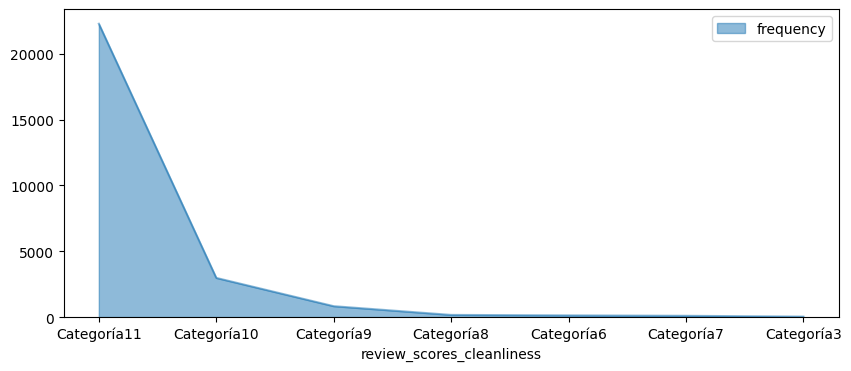

In [839]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [840]:
Min = data["review_scores_accuracy"].min()  
Max = data["review_scores_accuracy"].max()  
Limites = [Min,Max]
Limites


[1.0, 5.0]

In [841]:
#Calcula el rango
R = Max - Min
R

4.0

In [842]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [843]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [844]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [845]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [846]:
data["review_scores_accuracy"] = pd.cut(x = data["review_scores_accuracy"], bins = intervalos, labels = categorias)
data["review_scores_accuracy"]

0        Categoría11
1        Categoría10
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
26577    Categoría11
26578    Categoría11
26579    Categoría11
26580    Categoría11
26581    Categoría11
Name: review_scores_accuracy, Length: 26582, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [847]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_accuracy"])
data1

,review_scores_accuracy,frequency,percentage,cumulative_perc
0,Categoría11,23355,0.878602,0.880689
1,Categoría10,2103,0.079114,0.959991
2,Categoría9,693,0.026070,0.986123
3,Categoría8,137,0.005154,0.991289
4,Categoría6,107,0.004025,0.995324
5,Categoría7,77,0.002897,0.998228
6,Categoría3,29,0.001091,0.999321
7,Categoría5,14,0.000527,0.999849
8,Categoría2,2,0.000075,0.999925
9,Categoría4,2,0.000075,1.000000


In [848]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table16 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table16

,review_scores_accuracy,frequency
0,Categoría11,23355
1,Categoría10,2103
2,Categoría9,693
3,Categoría8,137
4,Categoría6,107
5,Categoría7,77
6,Categoría3,29
7,Categoría5,14
8,Categoría2,2
9,Categoría4,2


In [849]:
filtro16 = table16[table2['frequency'] > 70]
filtro16

C:\Users\HP\AppData\Local\Temp\ipykernel_13432\1528683562.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro16 = table16[table2['frequency'] > 70]


,review_scores_accuracy,frequency
0,Categoría11,23355
1,Categoría10,2103
2,Categoría9,693
3,Categoría8,137
4,Categoría6,107
5,Categoría7,77
6,Categoría3,29
7,Categoría5,14
8,Categoría2,2
9,Categoría4,2


In [850]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro16.set_index("review_scores_accuracy")
Filtro_index

,frequency
review_scores_accuracy,
Categoría11,23355
Categoría10,2103
Categoría9,693
Categoría8,137
Categoría6,107
Categoría7,77
Categoría3,29
Categoría5,14
Categoría2,2


Text(0, 0.5, 'Frecuencia')

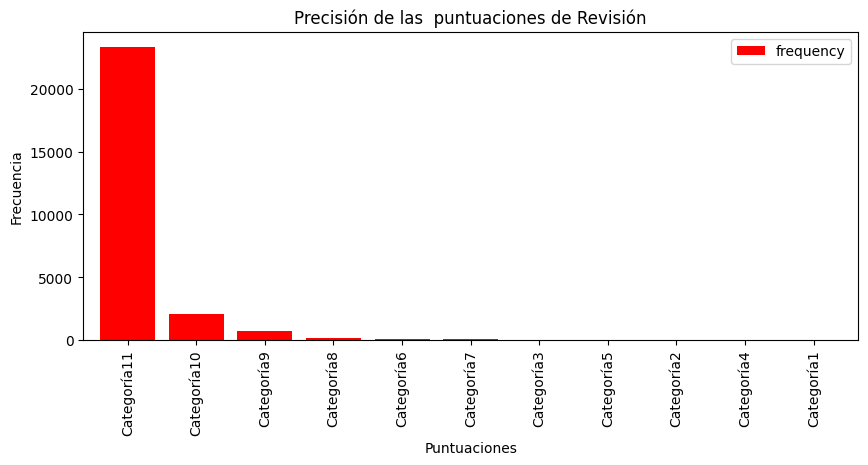

In [851]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('Precisión de las  puntuaciones de Revisión')
plt.xlabel('Puntuaciones')
plt.ylabel('Frecuencia')